<a href="https://colab.research.google.com/github/wheemin-2/24-2-ESAA/blob/main/1122_HW_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **군집화**

## **K-평균 알고리즘**

군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘

군집 중심점(centroid)이라는 특정한 임의의 지점을 선택하여 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
* 군집 중심점 : 선택된 포인트의 평균 지접으로 이동 > 이동된 중심점에서 다시 가까운 포인트 선택 > 다시 중심점을 평균 지점으로 이동 하는 과정을 반복적으로 수행
* 모든 포인트에서 더 이상 중심점의 이동이 없을 경우 반복을 중단하고 해당 중심점에 속하는 데이터 포인트들을 군집화

 ![k-mean clustering](https://img1.daumcdn.net/thumb/R1280x0.fjpg/?fname=http://t1.daumcdn.net/brunch/service/user/8fdM/image/YxUA7B2IFH-tFi8ItQjEqxAU9lM)

*K-mean의 장점*

* 일반적인 군집화에서 가장 많이 활용됨
* 알고리즘이 쉽고 간결

*K-mean의 단점*

* 거리 기반 알고리즘으로, 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
    * 이를 방지하기 위해 PCA로 차원 축소 후 적용해야할 수도 있음
* 반복 횟수가 많을 경우 수행 시간이 매우 길어짐
* 몇 개의 cluster를 선택해야 할지 가이드하기가 어려움

*사이킷런 KMeans 클래스*



```
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++',
 n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
```

* n_clusters : 군집화할 개수 = 군집 중심점의 개수
* init : 초기에 군집 중심점의 좌표를 설정할 방식, 일반적으로 'k-means++' 방식을 사용
* max_iter : 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료됨



*KMeans 객체 속성*

* labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
* cluster_centers_ : 각 군집 중심점 좌표
    * shape : (군집 개수, 피처개수)

### **K-평균을 이용한 붓꽃 데이터 세트 군집화**

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# dataframe 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
# 3개 그룹으로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# labels_ 속성값을 통해 irisDF의 각 데이터가 어떤 중심에 속하는지 확인
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [ ]:
# 시각화
# 붓꽃 데이터 세트의 속성이 4개이므로 pca를 이용하여 2개로 차원 축소 진행
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


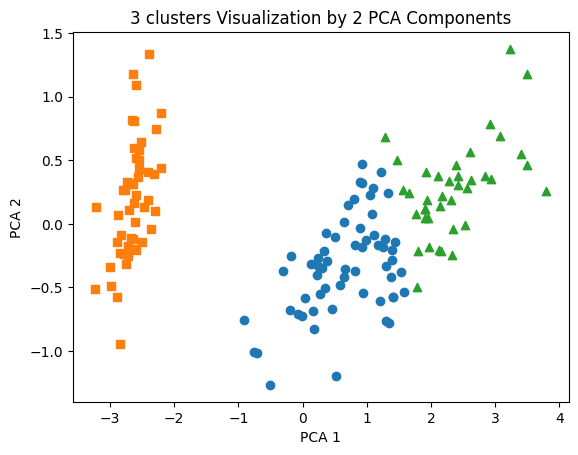

In [ ]:
# 군집값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출, 마커로 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters Visualization by 2 PCA Components')
plt.show()

Cluster 0, 1의 경우 속성의 위치 자체가 명확히 분리되기 어려운 부분이 존재함

### **군집화 알고리즘 테스트를 위한 데이터 생성**

대표적인 군집화용 데이터 생성기 : make_blobs(), make_classification()

**make_blobs() 사용법**

* 결과 : 피처 데이터, 타겟 데이터 세트가 Tuple로 반환됨
* 호출 파라미터
    * n_samples : 생성할 총 데이터 개수, default : 100
    * n_features : 데이터의 피처 개수
        * 시각화를 목표로 할 경우 2로 설정, (x 좌표, y 좌표)로 표현
    * centers
        * int 값인 경우 군집의 개수를 나타냄
        * ndarray 형태인 경우 개별 군집 숭심점의 좌표를 의미
    * cluster_std : 생성될 군집 데이터의 표준편차를 의미
        * cluster_std 가 작을수록 군집 중심에 데이터가 모여있음
        * [0.8, 1.2, 0.6] : 3개의 군집별로 서로 다른 표준편차를 가지도록 데이터 세트 생성

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# target 값 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
# 데이터프레임으로 변경

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


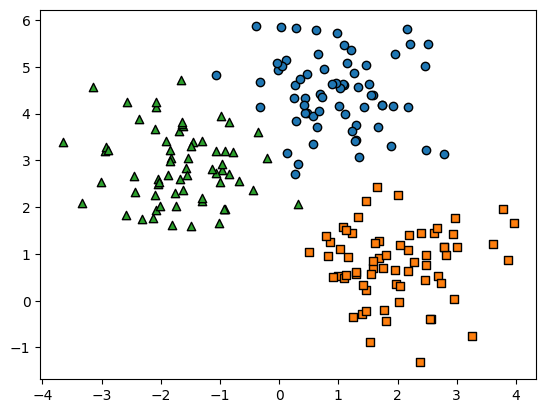

In [ ]:
# make_blob()으로 만든 피처 데이터 세트의 군집화 분포 확인
target_list = np.unique(y)
markers=['o','s','^','P','D','H','x']

for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',marker=markers[target])

plt.show()

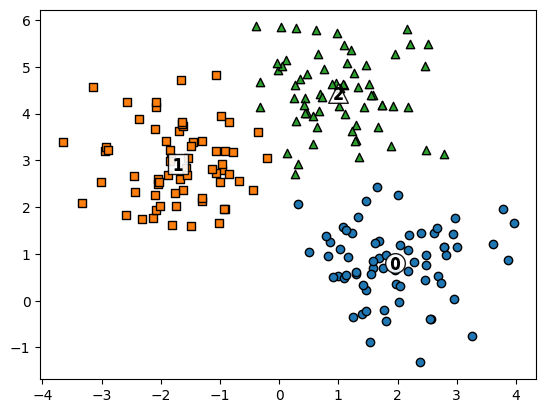

In [ ]:
# KMeans 군집화 수행 후 군집별로 시각화 진행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers : 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers=['o','s','^','P','D','H','x']

for label in unique_labels :
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$'%label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


Target 0 -> cluster label 2

Target 1 -> 0

Target 2 -> 1 로 거의 대부분 잘 매핑됨

## **군집 평가 (Cluster Evaluation)**

### **실루엣 분석(silhouette analysis)**

군집화 평가 방법으로, 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타냄

효율적으로 잘 분리되었다 > 다른 군집과의 거리는 떨어져있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐있다는 의미
 * 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것





*실루엣 계수(Silouette Coefficient)*

* 실루엣 분석은 실루엣 계수를 기반으로 함
* 개별 데이터가 가지는 군집화 지표
* 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터가 얼마나 가깝게 군집화되어있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타냄

 ![shilouette coefficient](https://velog.velcdn.com/images/jwkim_1018/post/79480df2-4bc8-4bd2-8d8c-9e340c5aca6b/image.png)

*실루엣 계수 값 계산식*

> $s(i)= \frac{(b(i)-a(i))}{max(a(i),b(i))}$

* i번째 데이터 포인트의 실루엣 계수 값
* $a(i)$ : 해당 데이터 포인트와 같은 군집 내의 다른 데이터 포인트와의 거리를 평균한 값
* $b(i)$ : 해당 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
* $b(i)-a(i)$ : 두 군집 간의 거리가 얼마나 떨어져 있는지를 나타냄
* $max(a(i),b(i))$ 로 나눠주며 정규화

*실루엣 계수 값의 의미*

* -1 ~ 1 사이의 값을 가짐
* 1에 가까워질수록 근처의 군집과 더 멀리 떨어져있다는 것
* 0에 가까울수록 근처의 군집과 가까워진다는 것
* (-)값 : 아예 다른 군집에 데이터 포인트가 할당되었음

#### **사이킷런을 통한 실루엣 분석**

사이킷런은 실루엣 분석을 위해 다음과 같은 메서드를 제공함



```
sklearn.metrics.silhouette_samples(X, labels, metric='euclidean',**kwds)

sklearn.metrics.silhouette_score(X, labels, metric='euclidean',sample_size=None, **kwds)
```

* silhouette_samples : 인자로 X 피처 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환함
* silhouette_score : 인자로 X 피처 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣 계수값을 평균하여 반환
    * np.mean(silhouette_samples())

*좋은 군집화 판단하기*

* silhouette_score() 값이 0 ~ 1 사이 (1에 가까울수록 좋음)
* 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야함
    * 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계쑤의 평균값에서 크게 벗어나지 않는 것이 중요함
    * 전체 실루엣 계수의 평균값은 높지만 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮다면 좋은 군집화 조건이 아님

### **붓꽃 데이터 세트를 이용한 군집 평가**

In [ ]:
# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns = feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [ ]:
# 군집별 평균 실루엣 계수값
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


1번 군집에 비해 0, 2번의 실루엣 계수 평균값이 낮음 > 전체 평균 실루엣 계수 값이 0.551

### **군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

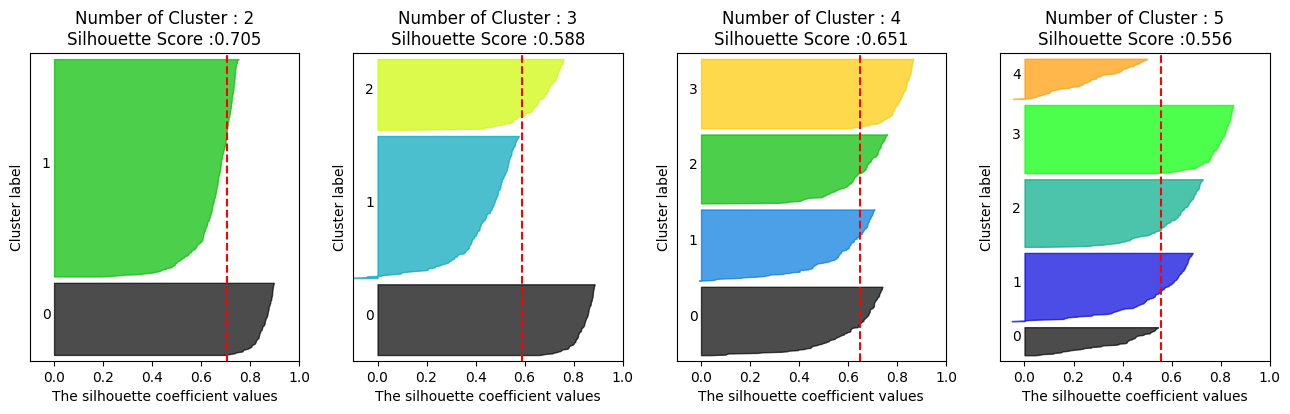

In [ ]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10,10), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

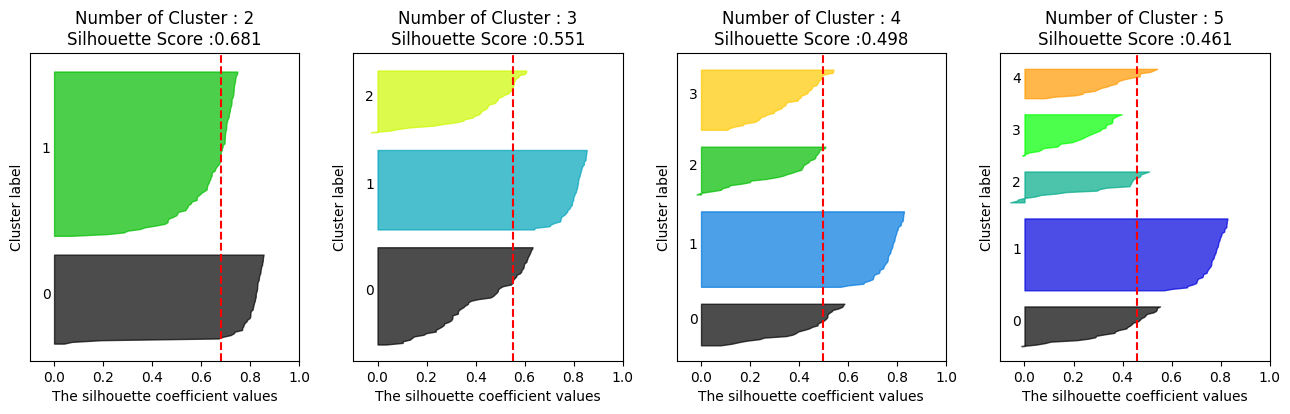

In [ ]:
iris = load_iris()
visualize_silhouette([2,3,4,5], iris.data)

군집 개수를 2개로 하는 것이 가장 좋아보임

3개 : 평균 실루엣 계수 값 작음 + 1번 군집과 나머지 군집 간의 실루엣 계수값 편차가 큼